<a href="https://www.kaggle.com/code/mohamedboghdadyy/fe-segmentation-using-pca-k-means?scriptVersionId=159308622" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from matplotlib.patches import Circle

# Prepare

In [2]:
dataset = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv').set_index('CustomerID')
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Exploring the data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Visualize the data

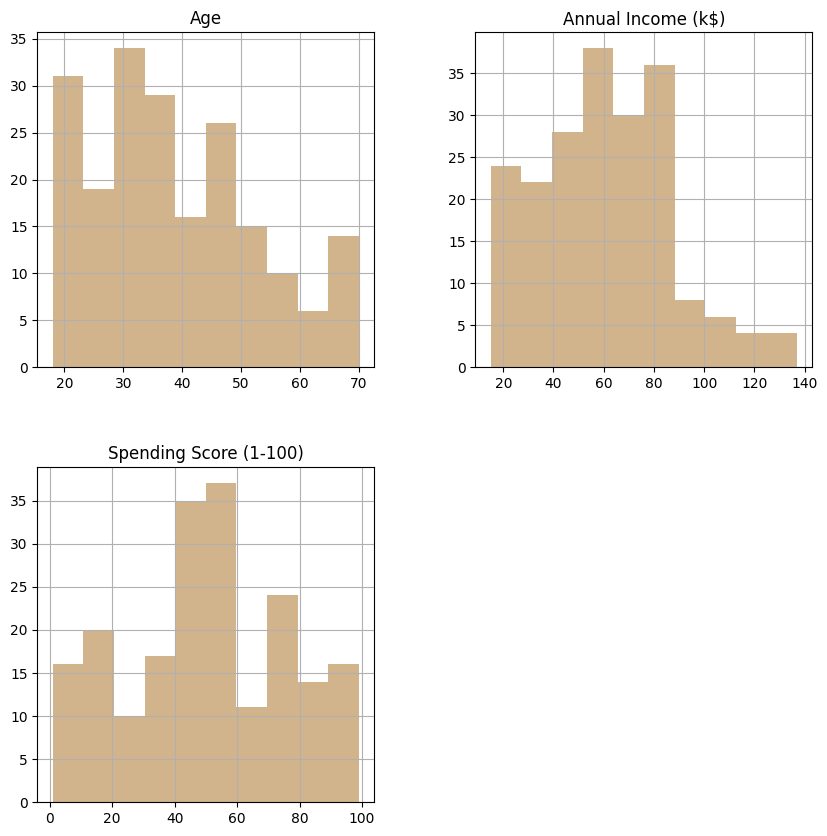

In [8]:
# ploting the histogram with gradient color map
dataset.hist(figsize=(10,10), color='tan');

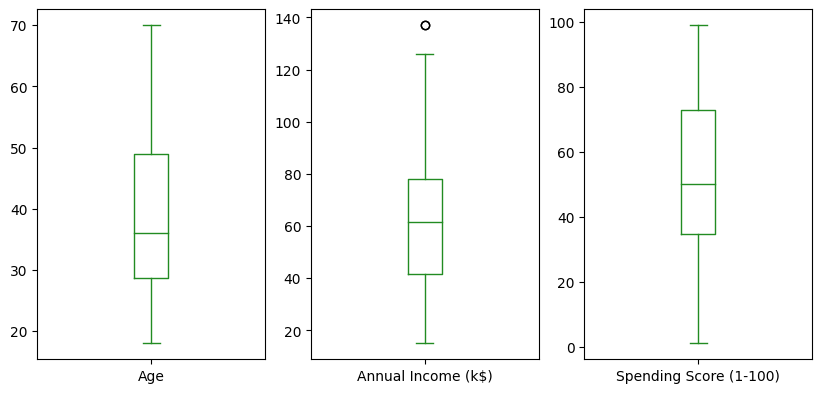

In [9]:
# ploting the boxplot with different unique colors
dataset.plot(kind='box', subplots=True, layout=(2,3), figsize=(10,10),color='forestgreen');

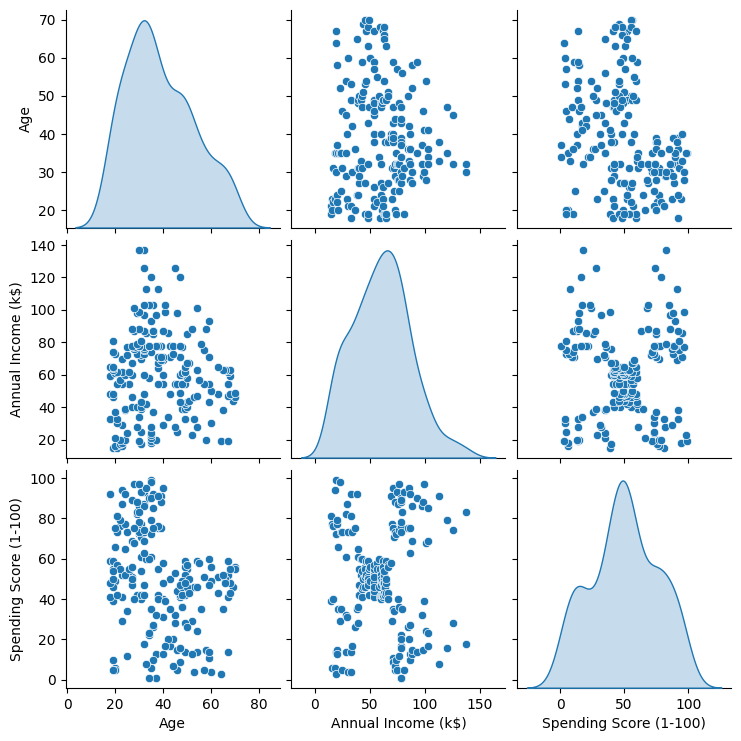

In [10]:
# ploting the pairplot with line of best fit
sns.pairplot(dataset, diag_kind='kde');

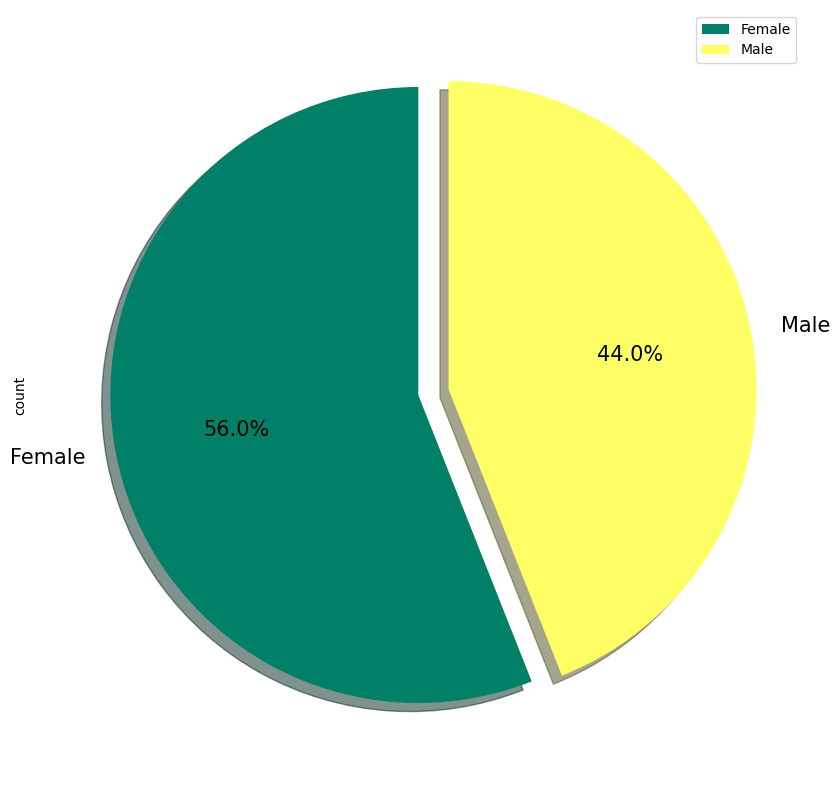

In [11]:
dataset['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), shadow=True, explode=[0,0.1], startangle=90, legend=True, cmap='summer', fontsize=15);

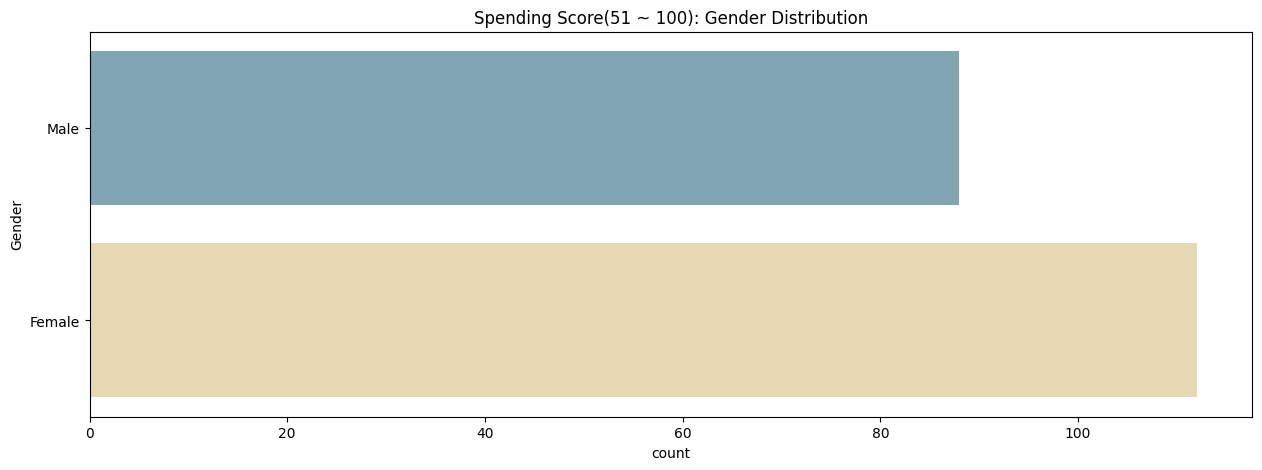

In [12]:
plt.figure(figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = dataset,palette="blend:#7AB,#EDA")
plt.title('Spending Score(51 ~ 100): Gender Distribution')
plt.show();

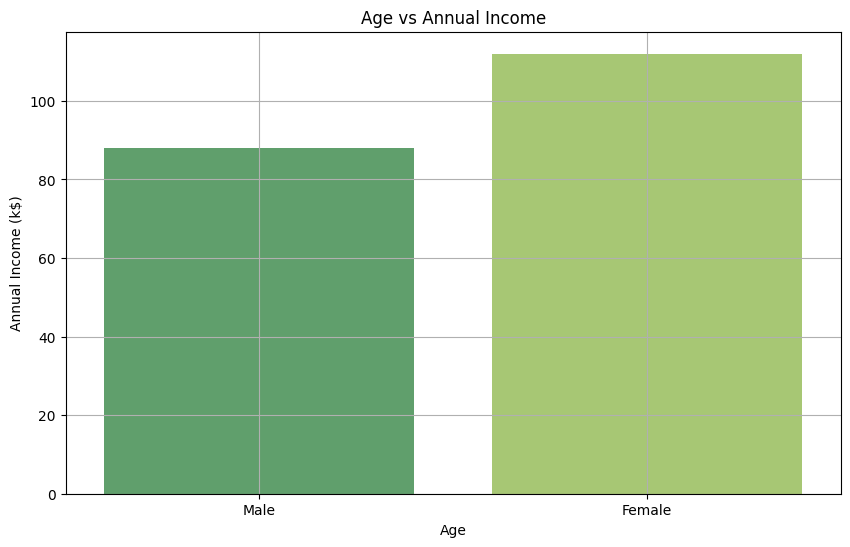

In [13]:
# Plotting Age vs Annual Income
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=dataset, palette='summer')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.grid(True)
plt.show()

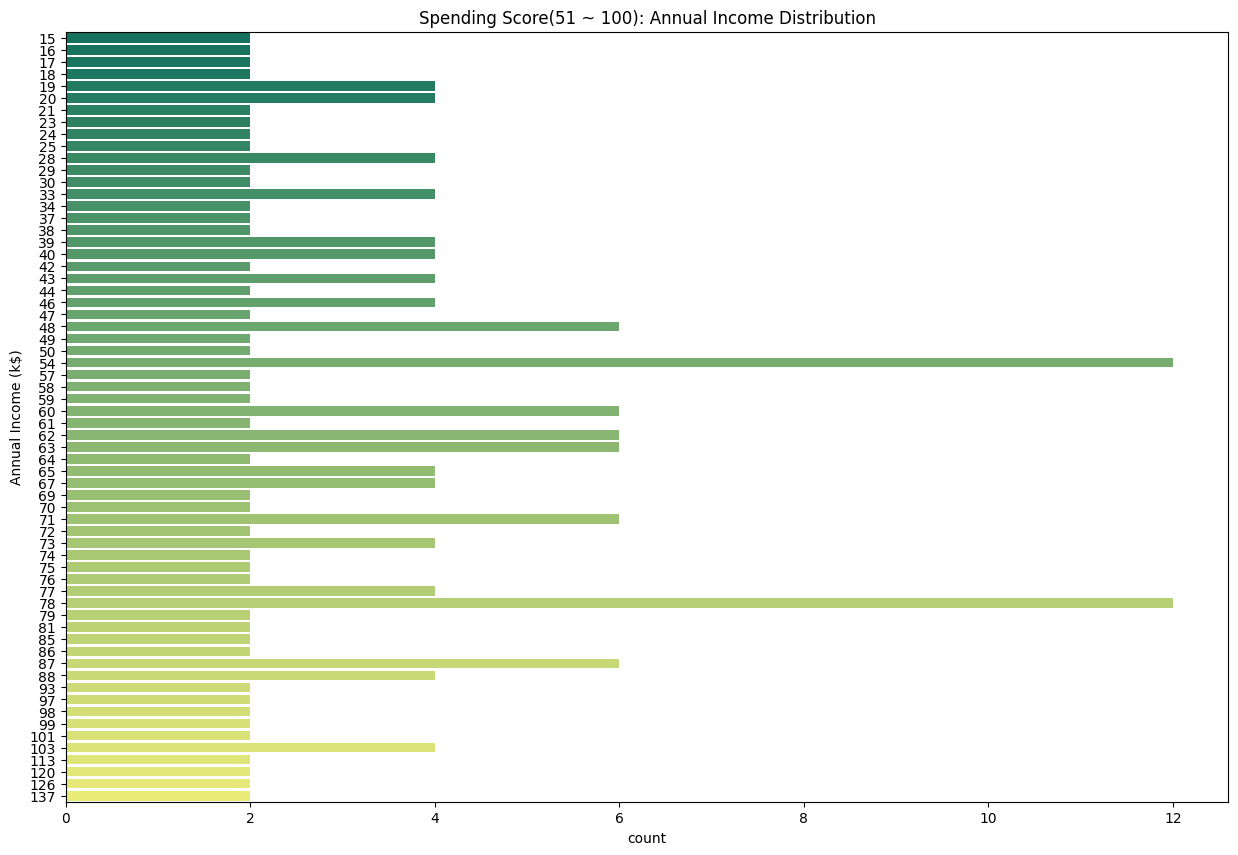

In [14]:
plt.figure(figsize = (15 , 10))
sns.countplot(y = 'Annual Income (k$)' , data = dataset,palette="summer")      
plt.title('Spending Score(51 ~ 100): Annual Income Distribution')
plt.show();

# Model 

In [15]:
X=dataset

In [16]:
le=LabelEncoder()
dataset['Gender']=le.fit_transform(dataset['Gender'])
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [18]:
dataset = pca.fit_transform(dataset)

In [19]:
model = KMeans(random_state= 42)


In [20]:
params={
    'n_clusters': [2,3,4,5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 30, 50, 100, 200],
    'max_iter': [100, 300, 500, 1000, 2000]

}

In [21]:
gs = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1)

In [22]:
gs.fit(dataset)

GridSearchCV(cv=5, estimator=KMeans(random_state=42), n_jobs=-1,
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 300, 500, 1000, 2000],
                         'n_clusters': [2, 3, 4, 5],
                         'n_init': [10, 30, 50, 100, 200]})

In [23]:
gs.best_params_

{'init': 'k-means++', 'max_iter': 100, 'n_clusters': 5, 'n_init': 10}

# Evaluating 

In [24]:
centroids = gs.best_estimator_.cluster_centers_
label = gs.best_estimator_.labels_  

In [25]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(dataset, label)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5526264331833407


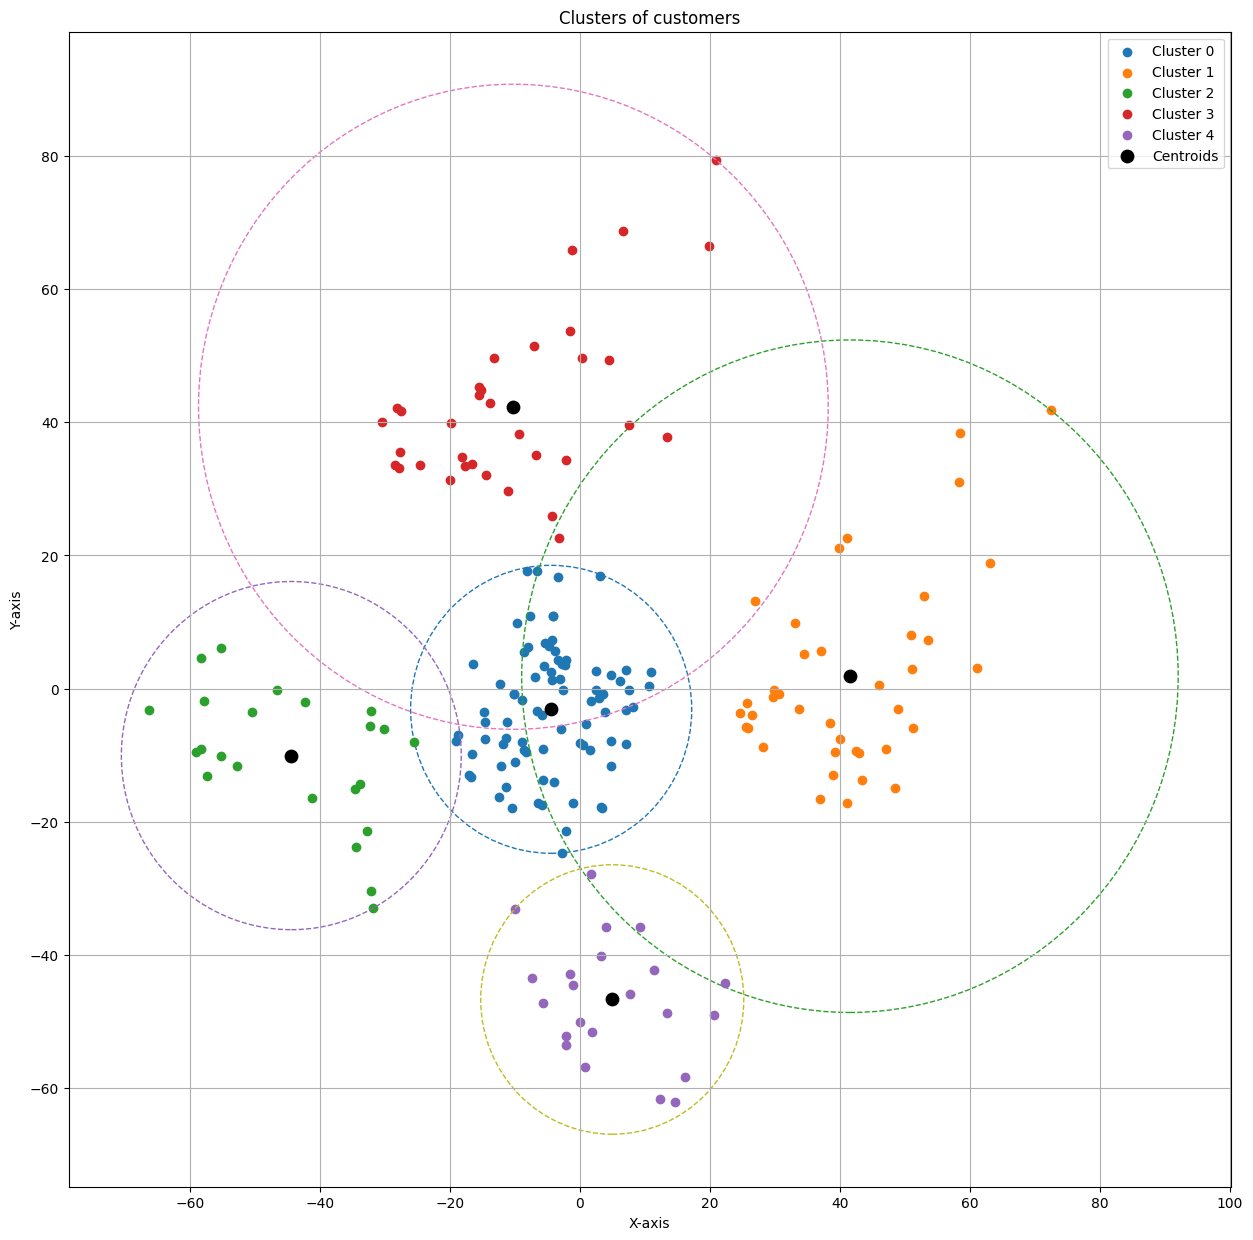

In [26]:
u_labels = np.unique(label)
# Plotting the results:
plt.figure(figsize=(15, 15))

for i in u_labels:
    cluster_points = dataset[label == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

    # Calculate the center of the cluster
    cluster_center = centroids[i]
    
    # Calculate the radius as the maximum distance from the center to any point in the cluster
    radius = np.max(np.linalg.norm(cluster_points - cluster_center, axis=1)) 
    
    # Create and plot a circle around the cluster with a unique color for each cluster
    color = plt.cm.tab10(i / len(u_labels))  # Use colormap to get distinct colors
    circle = Circle(cluster_center, radius, edgecolor=color, facecolor='none', linestyle='dashed')
    plt.gca().add_patch(circle)

plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='k', label='Centroids')
plt.legend()
plt.title('Clusters of customers') 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

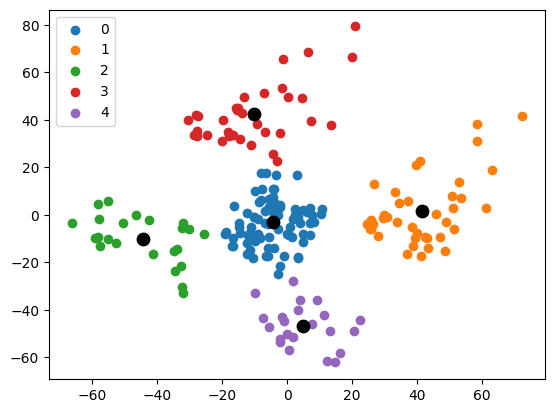

In [27]:
u_labels = np.unique(label)
 #plotting the results:
 
for i in u_labels:
    plt.scatter(dataset[label == i , 0] , dataset[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

# Communicating Results

In [28]:
xgb= X.groupby(label).mean()
fig = px.bar(
    xgb,
    barmode= 'group',
    title= "Annual income and spending score by Cluster"
)
fig.update_layout(xaxis_title= "Clusters" , yaxis_title= 'Value')

fig.show()